<a href="https://colab.research.google.com/github/akshpatel26/Machine-Learning-Model/blob/main/Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir("/content/drive/MyDrive/ML-aksh/Data")



In [ ]:
df=pd.read_csv('NaiveBayes.csv')
df

,Age,Salary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Age        400 non-null    int64
 1   Salary     400 non-null    int64
 2   Purchased  400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [ ]:
x=df.iloc[:,[0,1]].values
y=df.iloc[:,2].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

# Bernoulli Naive Bayes classifier

In [ ]:
from sklearn.naive_bayes import BernoulliNB
gnb=BernoulliNB()
gnb.fit(x_train,y_train)

BernoulliNB()

In [ ]:
y_pred=gnb.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.77

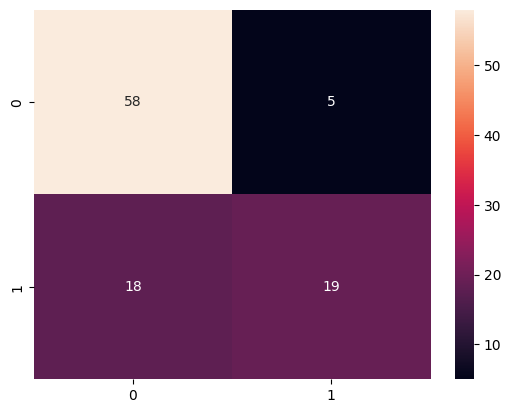

In [ ]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.92      0.83        63
           1       0.79      0.51      0.62        37

    accuracy                           0.77       100
   macro avg       0.78      0.72      0.73       100
weighted avg       0.77      0.77      0.76       100



#  Gaussian Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [ ]:
y_pred1=gnb.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred1)

0.93

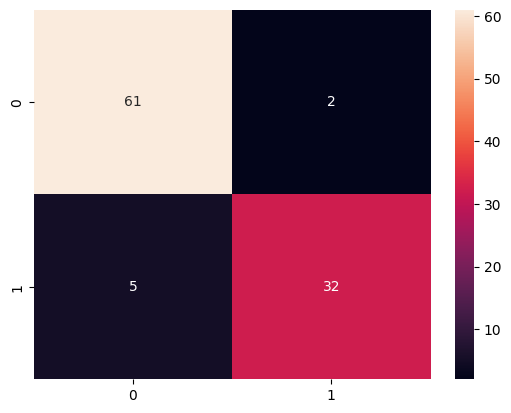

In [ ]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,y_pred1),annot=True)
plt.show()

In [ ]:
#classification report

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95        63
           1       0.94      0.86      0.90        37

    accuracy                           0.93       100
   macro avg       0.93      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



# Features Encoding

In real life, the data does not always consist of numeric values. For example, playing or not playing are not numeric values. In such scenarios, we need to convert the non-numeric data to numeric values before feeding data to our model.

In [ ]:
#Sample data set
# assigning features and label variables
weather = ['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny', 'Rainy','Sunny','Overcast','Overcast','Rainy']
# output class
play = ['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

for example, Overcast = 0, Rainy = 1, Sunny = 2. This is called label encoding.

In [ ]:
# Import LabelEncoder
from sklearn import preprocessing
# creating LabelEncoder
labelCode = preprocessing.LabelEncoder()
# Converting string labels into numbers.
wheather_encoded=labelCode.fit_transform(weather)

In [ ]:
print(wheather_encoded)

[2 2 0 1 1 1 0 2 2 1 2 0 0 1]


In [ ]:
from sklearn import preprocessing
# creating LabelEncoder
labelCode = preprocessing.LabelEncoder()
# converting string labels into numbers.
label=labelCode.fit_transform(play)

In [ ]:
#
import numpy as np
wheather_2d=np.reshape(wheather_encoded,(-1,1))

In [ ]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(wheather_2d,label)

GaussianNB()

In [ ]:
predicted=model.predict([[0]])
print(predicted)
# output value 1 indicates that players will Play when there’s an Overcast weather.

[1]


# Naive Bayes Classification with Multiple Labels


In [ ]:
from sklearn import datasets
dataset = datasets.load_wine()

In [ ]:
print ("Inputs: ", dataset.feature_names)
print ("Outputs: ", dataset.target_names)

Inputs:  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Outputs:  ['class_0' 'class_1' 'class_2']


In [ ]:
print(dataset.data[0:4])

[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]]


In [ ]:
print(dataset.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [ ]:
# import train_test_split function
from sklearn.model_selection import train_test_split
# input and outputs
inputs = dataset.data
outputs = dataset.target
# split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(inputs, outputs, test_size=0.3, random_state=1)

In [ ]:
# import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
# create a Gaussian Classifier
classifer = GaussianNB()
# train the model using the training sets
classifer.fit(X_train, y_train)
# predict the response for test dataset
y_pred = classifer.predict(X_test)

In [ ]:
# import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# printing accuracy
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9814814814814815


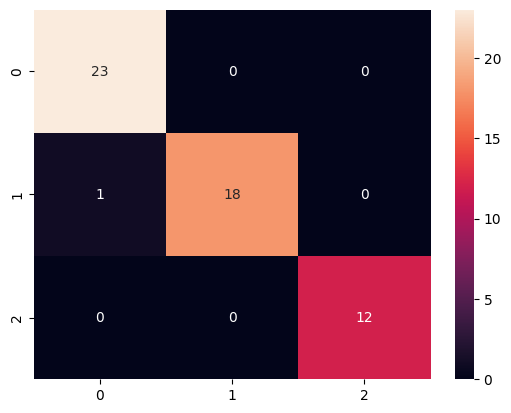

In [ ]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.show()

In [ ]:
# Importing classification report
from sklearn.metrics import classification_report
# printing the report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        23
           1       1.00      0.95      0.97        19
           2       1.00      1.00      1.00        12

    accuracy                           0.98        54
   macro avg       0.99      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54

